<a href="https://colab.research.google.com/github/Sushree-2000/EDA-on-Play-Store-Apps-Review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [173]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
df_PlayStore = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data sheets/Play Store Data.csv")

In [176]:
df_UserReview= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data sheets/User Reviews.csv")

In [177]:
df_PlayStore_copy = df_PlayStore.copy()
df_UserReview_copy = df_UserReview.copy()

##KEY FACTORS TO ANALYSE:
* Which CATEGORY is the best Category as per total number of installations in PlayStore.
* Highest Installed and highest rating App(s).
* Best app in user's perspective.
* Highest profitable app(s) for developers.
* Find out the ratios of Sentiments and which category had got highest number of Sentiments.
* Find out the correlation among all the features.

##About playstore dataset

In [178]:
df_PlayStore_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [179]:
df_PlayStore_copy.shape

(10841, 13)

In [180]:
#variables of the dataset
df_PlayStore_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

###**Column Description**
App: Name of app

Category: Category of app

Rating: Total rating of the app

Reviews: Total number of reviews

Size: Size of the app(in MB as M, and KB as k)

Installs: Number of installs done for this app

Type: Type of app(paid version/free)

Price: Price of app(if it's a paid version app)

Content Rating: Maturity rating (for everyone/for teen/for adult)

Genres: A particular type or style

Last Updated: Last updated date of the app

Current Ver: Current version of the app

Android Ver: Android version of the app

In [181]:
df_PlayStore_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [182]:
df_PlayStore_copy.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
#Number of unique values of each column
df_PlayStore_copy.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

##DATA CLEANING OF PLAYSTORE DATASET

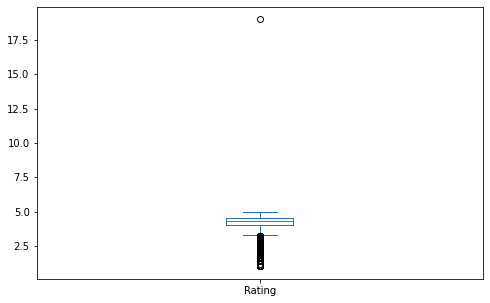

In [184]:
#Let's 1st apply box plot to our dataset to get an initial visualization
df_PlayStore_copy.plot(kind='box',figsize=(8,5))

###As 'Rating' is our only numerical column so box plot is plotted for that column only.
###Maximum range = 5.0
###From the plot we can see that one of the value for Ratings is exceeds the highest range, so let's find out and drop that value.

In [185]:
#Find the row where RAting value exceeds the highest rate 
df_PlayStore_copy[df_PlayStore_copy['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [186]:
#Drop the row
df_PlayStore_copy.drop(df_PlayStore_copy[df_PlayStore_copy['Rating']>5].index,axis=0,inplace=True)

##Check for the null values and duplicate values and remove them

###In this playstore data frame 'Reviews' , 'Size' , 'Installs' , 'Price' contain numerical typed values but in the form of object type. 
###So, 1st we need to convert these in numerical typed values and then remove the null values from the entire data set.

####>> DROP THE NULL VALUES 

In [187]:
#Total number of null values in each column
df_PlayStore_copy.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [188]:
#Fill the null values of Rating column with it's mean value 
df_PlayStore_copy['Rating'].fillna(df_PlayStore_copy['Rating'].mean(),inplace=True)

In [189]:
#Drop the null values from the playstore dataset
df_PlayStore_copy = df_PlayStore_copy.dropna(axis=0)

In [190]:
#Drop the duplicate values
df_PlayStore_copy.drop_duplicates(subset = ['App'],keep='first',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [191]:
df_PlayStore_copy.shape

(9648, 13)

In [192]:
df_PlayStore_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   object 
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


####>> CONVERT THE DATATYPES OF REQUIRED SERIESES

In [193]:
#Change the 'Reviews' series values to integer values
df_PlayStore_copy['Reviews'] = df_PlayStore_copy['Reviews'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [194]:
#Change the 'Size' series values from 'M'(mega byte) & 'k' (kilo byte) to bytes(in decimal) and the type from string to float
new_size=[]
for i in df_PlayStore_copy['Size']:
  if i=='Varies with device':
    i= 0.0
  elif 'M' in i:
    i=float(i.replace('M',''))*(10**6)   # 1mb = (1000**2)b=1000000 bytes (in decimal), 1mb =(1024**2)b=1024576 bytes(in binary)
  elif 'k' in i:
    i=float(i.replace('k',''))*(10**3)   # 1kb = 1000 bytes (in decimal), 1kb= 1024 bytes(in decimal)
  new_size.append(i)
df_PlayStore_copy['Size']=new_size

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [195]:
#Check if any of the value of the series 'Size' remain 'string'
for i in df_PlayStore_copy['Size']:
  if type(i) != float:
    print(i)

In [196]:
#Function for conversion of string to numeric
def convert_str_to_int(s=None):
  if s is None:
    return 0
  a=''
  for i in s:
    if i in np.arange(10).astype(str):
      a=a+i
  if a=='':
    return 0
  return int(a)

In [197]:
#Change the datatype of 'Installs' seies from String to int
df_PlayStore_copy['Installs']=df_PlayStore_copy['Installs'].apply(lambda s:convert_str_to_int(s))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [198]:
#Change the datatype of 'Price' series from String to float
df_PlayStore_copy['Price']=df_PlayStore_copy['Price'].apply(lambda s : float(convert_str_to_int(s)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [199]:
#Let's again check the info of the data set to know if the data types of the serieses got changed or not
df_PlayStore_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [200]:
df_PlayStore_copy.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [201]:
df_PlayStore_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### >>Now our dataset has neither any duplicate nor any null values

#**DATA ANALYSIS OF PLAYSTORE DATASET**

##1. Find out best category per highest Installation.

In [202]:
#Total number of installation per 'Category'
category_installs_df = df_PlayStore_copy[['Category','Installs']].groupby('Category',as_index=False).sum().sort_values('Installs',ascending=False)


In [203]:
category_installs_df

,Category,Installs
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001271905
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902
24,PHOTOGRAPHY,4649147655
11,FAMILY,4427881405
31,VIDEO_PLAYERS,3926902720
30,TRAVEL_AND_LOCAL,2894887146
21,NEWS_AND_MAGAZINES,2369217760


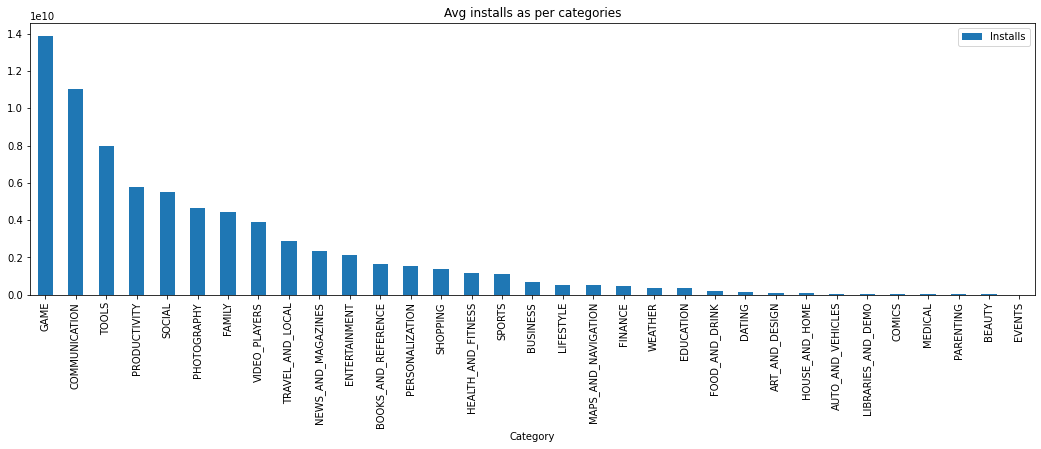

In [204]:
#Plot a graph for highest installed category to visualize
plt.rcParams['figure.figsize']=(18,5)
category_installs_df.plot(x='Category',y='Installs',kind='bar')
plt.title("Avg installs as per categories")
#plt.ylabel("Installs")
#plt.xlabel("Category")
plt.show()

* Game is the most used and popular category among all with maximum number of installed apps. 

##Now let's check for the best category according to their average installations, ratings and price per category.

In [205]:
#Create a dataset for average installs,rating and price as per category
avg_= df_PlayStore_copy[['Category','Rating','Installs','Price']].groupby(['Category']).mean().reset_index()
avg_

,Category,Rating,Installs,Price
0,ART_AND_DESIGN,4.367861,1.814811e+06,9.476190
1,AUTO_AND_VEHICLES,4.190601,6.250613e+05,15.847059
2,BEAUTY,4.260553,5.131519e+05,0.000000
3,BOOKS_AND_REFERENCE,4.308920,7.538319e+06,54.194570
4,BUSINESS,4.133347,1.659916e+06,41.735714
5,COMICS,4.181848,8.032348e+05,0.000000
6,COMMUNICATION,4.134647,3.504215e+07,26.393651
7,DATING,4.018100,8.241293e+05,16.046784
8,EDUCATION,4.362956,2.965983e+06,15.092437
9,ENTERTAINMENT,4.135294,2.072216e+07,7.823529


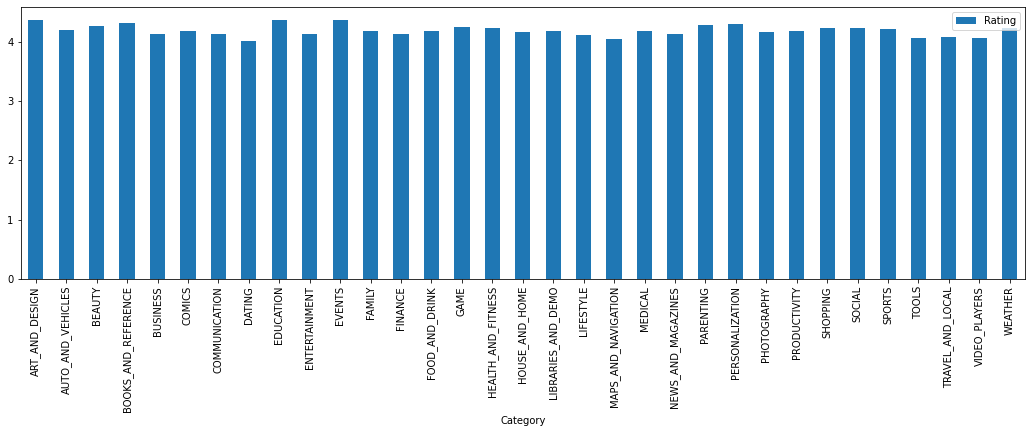

In [206]:
#Highest rated category
avg_.plot(x='Category',y='Rating',kind='bar')

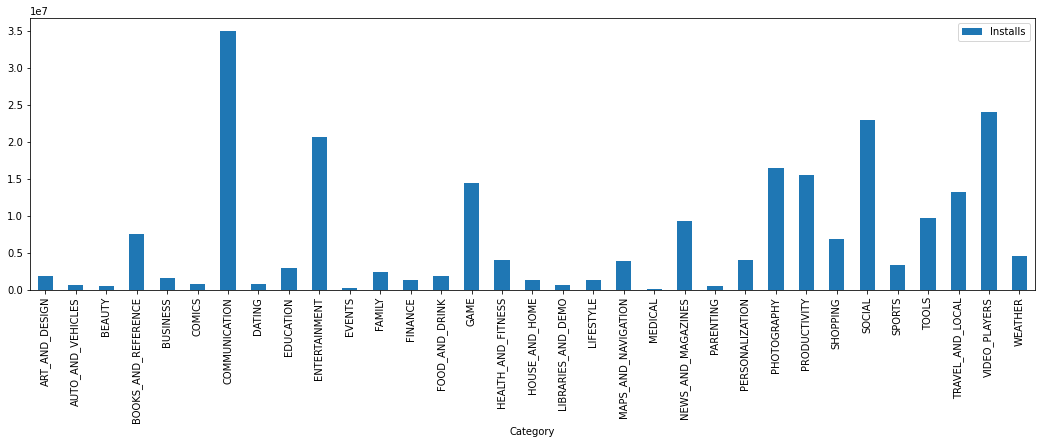

In [207]:
#Highest Installed category
avg_.plot(x='Category',y='Installs',kind='bar')

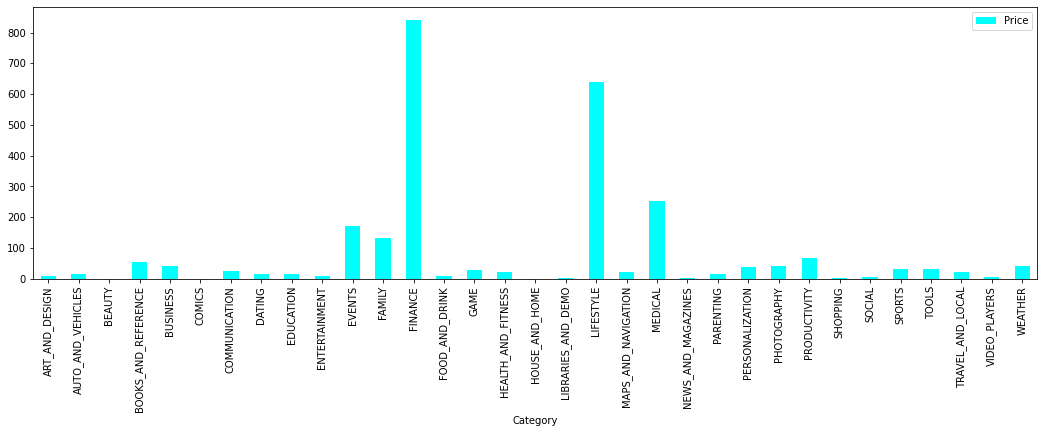

In [208]:
#Highest paid category
avg_.plot(x='Category',y='Price',kind='bar',color='cyan')

* COMMUNICATION Category has got highest installations on an average.
* Mostly FINANCE category apps are highly paid apps.

##2. Let's check highest installed apps and there details of each Category

* 1ST GET THE MAXIMUM INSTALLS PER CATEGORY

In [209]:
#Group by the CATEGORY and the MAX INSTALLED apps VALUE
cat_max_install=df_PlayStore_copy.groupby(['Category'],as_index=False)['Installs'].max()
cat_max_install

,Category,Installs
0,ART_AND_DESIGN,50000000
1,AUTO_AND_VEHICLES,10000000
2,BEAUTY,10000000
3,BOOKS_AND_REFERENCE,1000000000
4,BUSINESS,100000000
5,COMICS,10000000
6,COMMUNICATION,1000000000
7,DATING,10000000
8,EDUCATION,100000000
9,ENTERTAINMENT,1000000000


In [210]:
#Name of maximum installed apps per Category
maxInstalledAppsPerCategory = pd.DataFrame()  #app_details[['App','Installs']].groupby(['Category']).reset_index()
b=[]
for i,j in zip(cat_max_install['Category'],cat_max_install['Installs']):
  a=[]
  for k in df_PlayStore_copy.index:
    if df_PlayStore_copy['Category'][k]== i and df_PlayStore_copy['Installs'][k]==j:
      a.append(df_PlayStore_copy['App'][k])
  b.append(a)

In [211]:
maxInstalledAppsPerCategory['Category']=cat_max_install['Category']
maxInstalledAppsPerCategory['Installs']=cat_max_install['Installs']
maxInstalledAppsPerCategory['App']=b

In [212]:
maxInstalledAppsPerCategory

,Category,Installs,App
0,ART_AND_DESIGN,50000000,[Sketch - Draw & Paint]
1,AUTO_AND_VEHICLES,10000000,"[Android Auto - Maps, Media, Messaging & Voice..."
2,BEAUTY,10000000,[Beauty Camera - Selfie Camera]
3,BOOKS_AND_REFERENCE,1000000000,[Google Play Books]
4,BUSINESS,100000000,"[OfficeSuite : Free Office + PDF Editor, File ..."
5,COMICS,10000000,[LINE WEBTOON - Free Comics]
6,COMMUNICATION,1000000000,"[Messenger – Text and Video Chat for Free, Wha..."
7,DATING,10000000,"[Zoosk Dating App: Meet Singles, OkCupid Datin..."
8,EDUCATION,100000000,[Duolingo: Learn Languages Free]
9,ENTERTAINMENT,1000000000,[Google Play Games]


* Above is the name of the apps per category for highest installation.

In [213]:
#Merge the playstore dtaset and the cat_max_install dataset to get the details of the apps as per highest installation
app_details=pd.merge(df_PlayStore_copy,cat_max_install,how='inner',on=['Category','Installs'])[['Category','App','Installs','Rating','Reviews','Size','Price']]
app_details

,Category,App,Installs,Rating,Reviews,Size,Price
0,ART_AND_DESIGN,Sketch - Draw & Paint,50000000,4.5,215644,25000000.0,0.0
1,AUTO_AND_VEHICLES,"Android Auto - Maps, Media, Messaging & Voice",10000000,4.2,271920,16000000.0,0.0
2,AUTO_AND_VEHICLES,AutoScout24 - used car finder,10000000,4.4,186648,42000000.0,0.0
3,BEAUTY,Beauty Camera - Selfie Camera,10000000,4.0,113715,0.0,0.0
4,BOOKS_AND_REFERENCE,Google Play Books,1000000000,3.9,1433233,0.0,0.0
...,...,...,...,...,...,...,...
90,SPORTS,3D Bowling,100000000,4.1,1076243,13000000.0,0.0
91,SPORTS,FIFA Soccer,100000000,4.2,3909032,51000000.0,0.0
92,LIFESTYLE,Tinder,100000000,4.0,2789775,68000000.0,0.0
93,HEALTH_AND_FITNESS,Samsung Health,500000000,4.3,480208,70000000.0,0.0


In [214]:
app_details.nunique()

Category    33
App         95
Installs     6
Rating      13
Reviews     95
Size        33
Price        1
dtype: int64


* We have 95 apps with maximum number of installation for each 33 category

###Now let's plot graphs for app details comparing with maximum installations

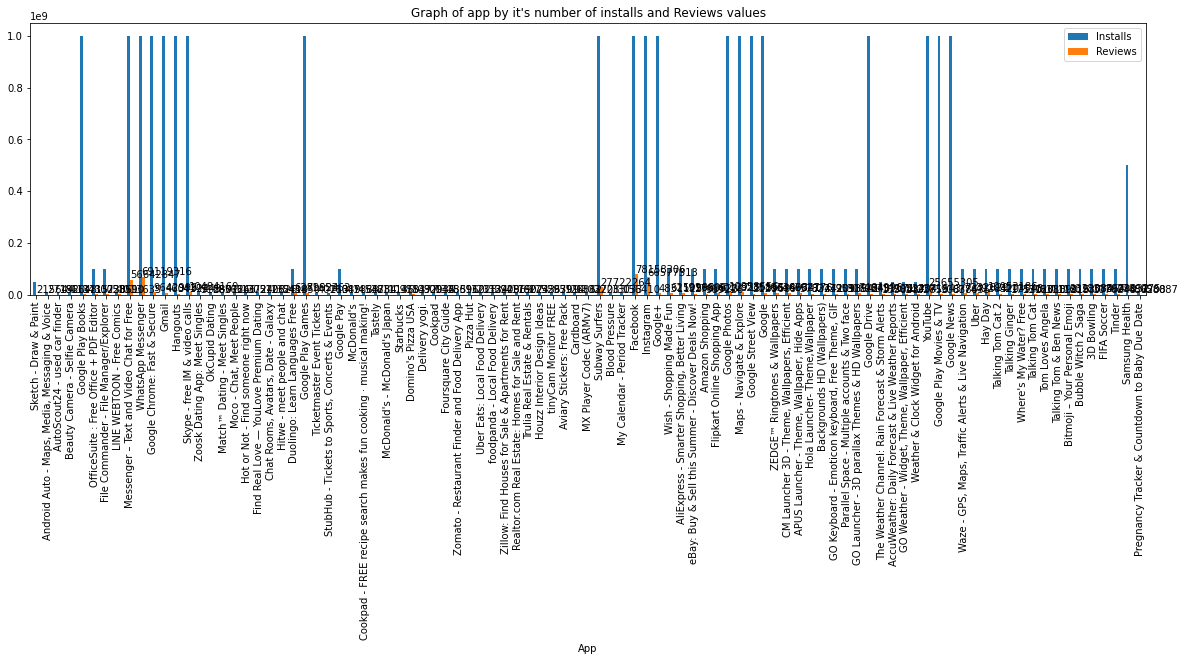

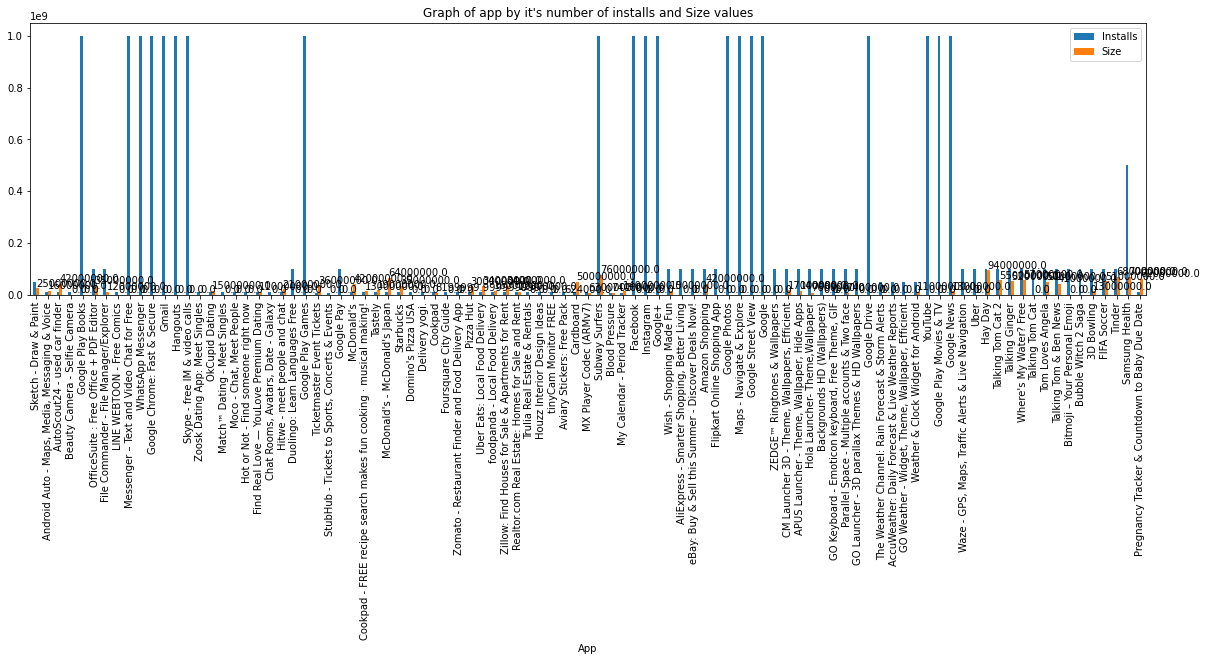

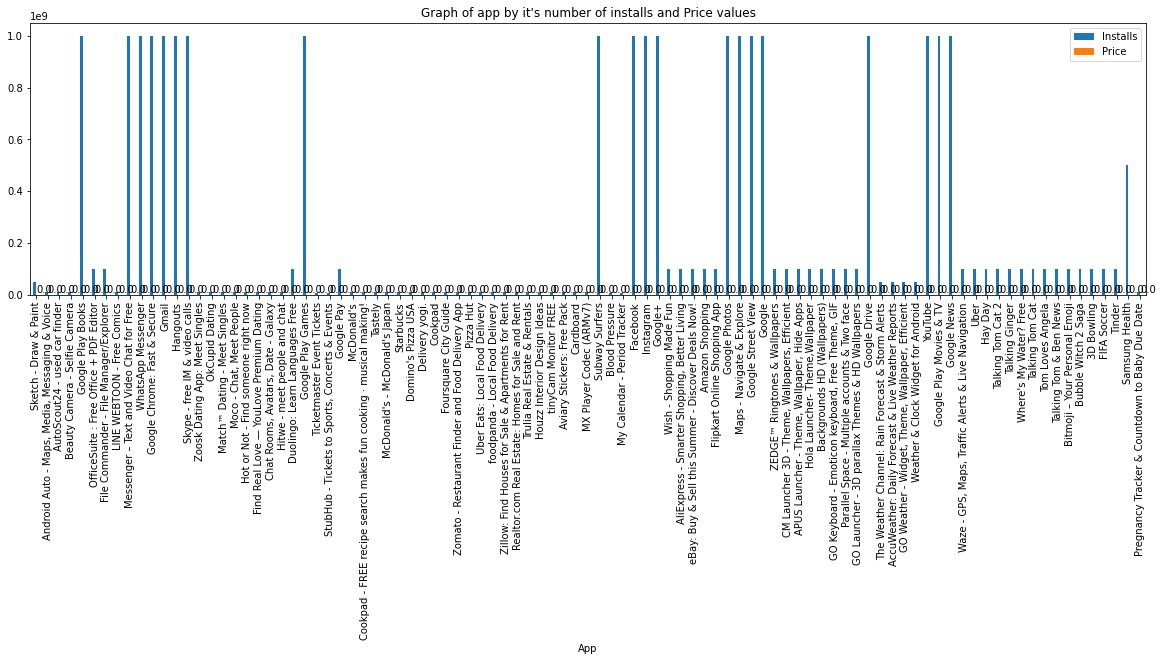

In [215]:
for i in app_details.columns:
  if i in ['Reviews','Size','Price']:  #!= 'app name' and i!= 'price':
    app_details.plot(x='App',y=['Installs',i],figsize=(20,5),kind='bar')
    plt.title(f"Graph of app by it's number of installs and {i} values")
    plt.xlabel=('App name')
    #plt.ylabel= i
    for j in app_details.index:
      #plt.annotate(app_details['Installs'][j],xy=(j,app_details['Installs'][j]),ha='center',va='bottom')
      plt.annotate(app_details[i][j],xy=(j,app_details[i][j]),ha='left',va='bottom')
    plt.show()

###>>From the above plots we can culminate that
* 'Facebook' app is the highest installed app with highest number of reviews of 78158306. So 'Facebook' is a vastly used app.
* 'Hay Day' app has maximum size of 94000000 bytes so it has low number of installation, and maximum number of installed apps have low size.Hence most of the users prefer low sized apps.
* Each app having maximum number of installation has 0 price.Hence most of the users prefer no cost apps.

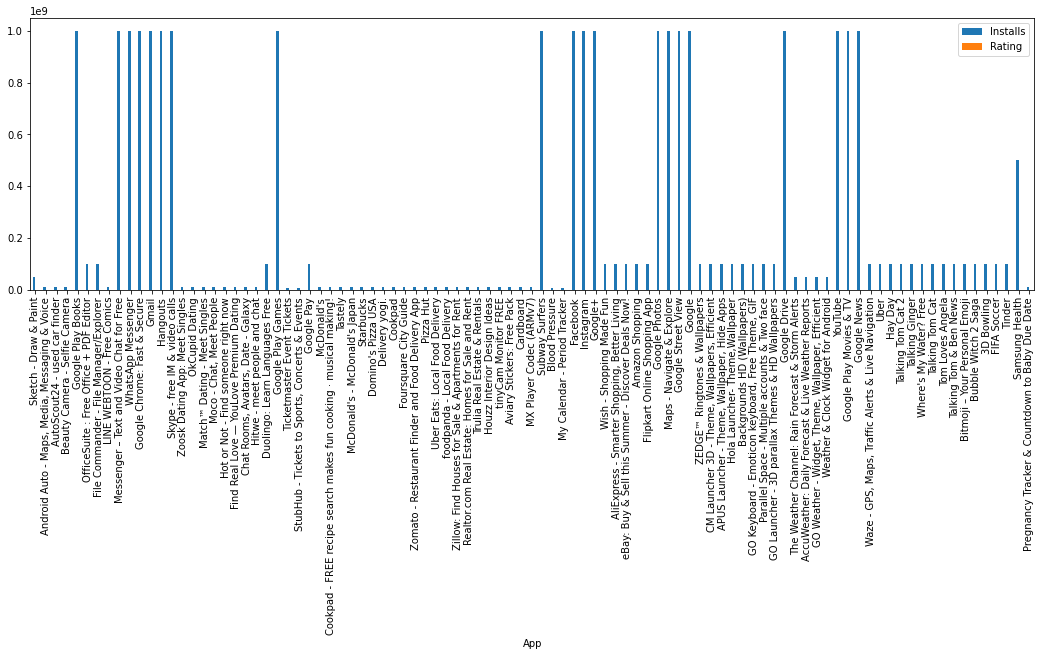

In [216]:
#Bar plot for comparision between 'Installs' and 'Rating' per 'App'
app_details.plot(x='App',y=['Installs','Rating'],kind='bar')

* As 'Rating' values are very small as compared to 'Installs' so we can't visualize their comparision.

##3. Best app(s) according to highest Installation and highest Rating in the whole playstore data set.

In [217]:
#Best apps per Install
best_App_Per_Install = df_PlayStore_copy[df_PlayStore_copy['Installs']==df_PlayStore_copy['Installs'].max()]
best_App_Per_Install

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,0.0,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,0.0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,0.0,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,0.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,0.0,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,0.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


In [218]:
#Best apps per Rating
best_App_Per_Rating = df_PlayStore_copy[df_PlayStore_copy['Rating']==df_PlayStore_copy['Rating'].max()]
best_App_Per_Rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000000.0,1000,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4400000.0,1000,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70000000.0,100,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9300000.0,500,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5000000.0,100,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16000000.0,100,Free,0.0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7900000.0,1000,Free,0.0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
10776,Monster Ride Pro,GAME,5.0,1,24000000.0,10,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8600000.0,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


In [219]:
#Best app(s) per Installs and highest Rating
best_App = best_App_Per_Install[best_App_Per_Install['Rating']==best_App_Per_Install['Rating'].max()]
best_App

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2545,Instagram,SOCIAL,4.5,66577313,0.0,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,0.0,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device


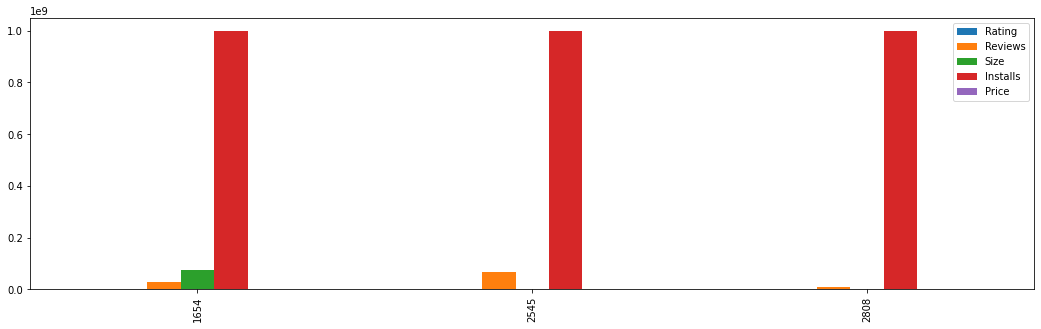

In [220]:
best_App.plot(kind='bar')

* 'GAME' , 'SOCIAL' , 'PHOTOGRAPHY' Category are best category as per Installations and Ratings.
* 'Subway surfers','Instagrams','Google Photos';These are the best apps as per Installation and Rating in user's standpoint.
* And also we can see that these best apps are all ,of free types.

##4. Find out the most profitable app.

###Check the ratios for Type of the apps using pie chart

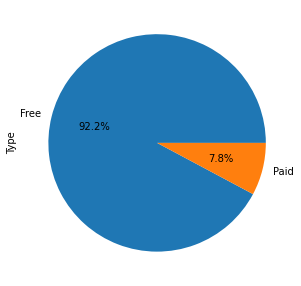

In [221]:
df_PlayStore_copy['Type'].value_counts().plot(kind='pie',labels=df_PlayStore_copy['Type'].unique(),autopct='%.1f%%')


* Almost 92% apps are free version and rest 8% apps are paid version apps.

##Let's check the best app(s) among the paid versions 


In [222]:
paid_apps=df_PlayStore_copy[df_PlayStore_copy['Type']!='Free'].sort_values(by='Price',ascending=False).reset_index()
paid_apps

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4367,I'm Rich - Trump Edition,LIFESTYLE,3.600000,275,7300000.0,10000,Paid,40000.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
1,5356,I Am Rich Premium,FINANCE,4.100000,1867,4700000.0,50000,Paid,39999.0,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
2,5373,I AM RICH PRO PLUS,FINANCE,4.000000,36,41000000.0,1000,Paid,39999.0,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
3,5369,I am Rich,FINANCE,4.300000,180,3800000.0,5000,Paid,39999.0,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
4,5364,I am rich (Most expensive app),FINANCE,4.100000,129,2700000.0,1000,Paid,39999.0,Teen,Finance,"December 6, 2017",2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,6102,My Virtual Boyfriend,FAMILY,4.300000,105,51000000.0,1000,Paid,99.0,Teen,Casual,"February 17, 2017",3.6,2.3.3 and up
749,6115,Droid PRoCon BF3,TOOLS,3.500000,412,2600000.0,5000,Paid,99.0,Everyone,Tools,"March 12, 2015",2.2,3.0 and up
750,6277,Bi-Tank Ads Free,GAME,4.191757,0,0.0,1,Paid,99.0,Everyone,Arcade,"July 31, 2017",1.1,4.1 and up
751,6292,BI Barcode Scanner,PRODUCTIVITY,4.191757,0,473000.0,10,Paid,99.0,Everyone,Productivity,"June 13, 2014",2.2,2.2 and up


In [223]:
installed_paid_apps= paid_apps[paid_apps['Installs']==paid_apps['Installs'].max()].sort_values(by='Rating',ascending=False)
installed_paid_apps

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
627,4034,Hitman Sniper,GAME,4.6,408292,29000000.0,10000000,Paid,99.0,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up
112,2241,Minecraft,FAMILY,4.5,2376564,0.0,10000000,Paid,699.0,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device


* So, these two paid apps 'Hitman Sniper' and 'Minecraft' of Category 'GAME' and 'FAMILY' respectively are the best apps in user's approach according to number of installation.

## Highest Profitable app for developers


In [224]:
total_price_value = paid_apps['Installs'].mul(paid_apps['Price'])#.sort_values(ascending=False)
total_price_value

0      4.000000e+08
1      1.999950e+09
2      3.999900e+07
3      1.999950e+08
4      3.999900e+07
           ...     
748    9.900000e+04
749    4.950000e+05
750    9.900000e+01
751    9.900000e+02
752    9.900000e+03
Length: 753, dtype: float64

In [225]:
profitable_apps = pd.DataFrame()
profitable_apps['Category']=paid_apps['Category']
profitable_apps['App']=paid_apps['App']
profitable_apps['Total Price']= total_price_value
profitable_apps['Genres']=paid_apps['Genres']

In [226]:
profitable_apps.sort_values(by='Total Price',ascending=False)


,Category,App,Total Price,Genres
112,FAMILY,Minecraft,6.990000e+09,Arcade;Action & Adventure
11,LIFESTYLE,I am rich,3.999900e+09,Lifestyle
1,FINANCE,I Am Rich Premium,1.999950e+09,Finance
627,GAME,Hitman Sniper,9.900000e+08,Action
117,GAME,Grand Theft Auto: San Andreas,6.990000e+08,Action
...,...,...,...,...
531,FAMILY,AP Series Solution Pro,0.000000e+00,Education
320,FAMILY,Ain Arabic Kids Alif Ba ta,0.000000e+00,Education
18,PRODUCTIVITY,cronometra-br,0.000000e+00,Productivity
64,SOCIAL,Ak Parti Yardım Toplama,0.000000e+00,Social


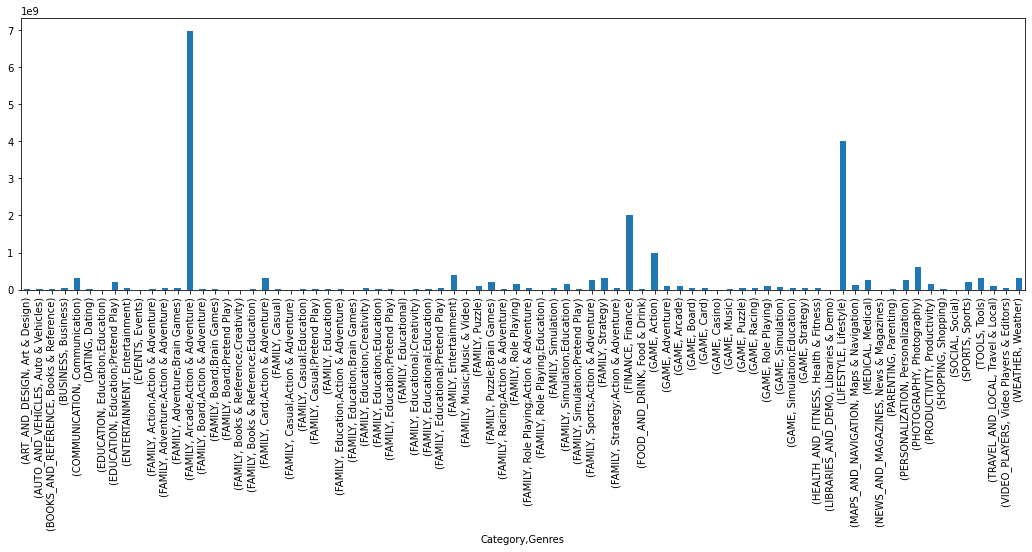

In [227]:
#Visualization for maximum profit app per Genres
profitable_apps.groupby(['Category','Genres'])['Total Price'].max().plot(kind='bar')

In [228]:
profitable_apps[profitable_apps['Total Price']==profitable_apps['Total Price'].max()]


,Category,App,Total Price,Genres
112,FAMILY,Minecraft,6.990000e+09,Arcade;Action & Adventure


* 'Arcade;Action & Adventure' Genres has got highest profit of FAMILY category, so this is the most profitable one for developers.
* 'Minecraft' App is the highest profitable app among all the app of that category.

##Let's do some analyzation using 'content rating' column


In [229]:
content_rating_df = df_PlayStore_copy[['Content Rating','Rating','Installs','Price']].groupby(['Content Rating'],as_index=False).sum()#.plot(x='Content Rating',y='Installs',kind='bar')


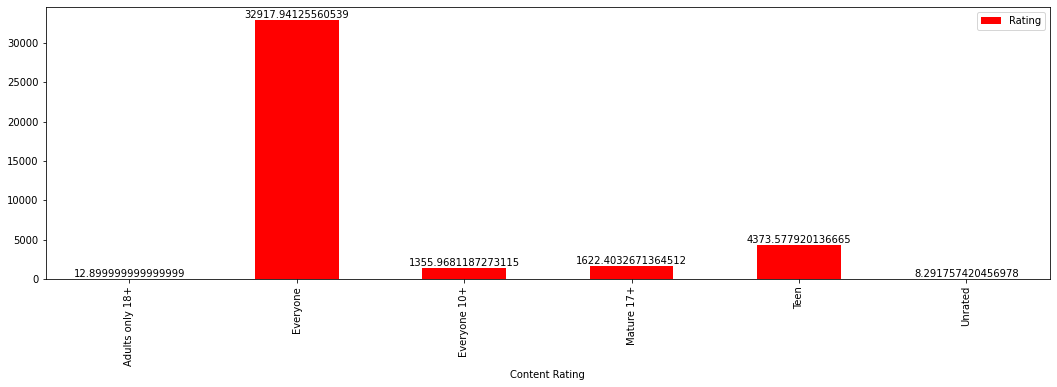

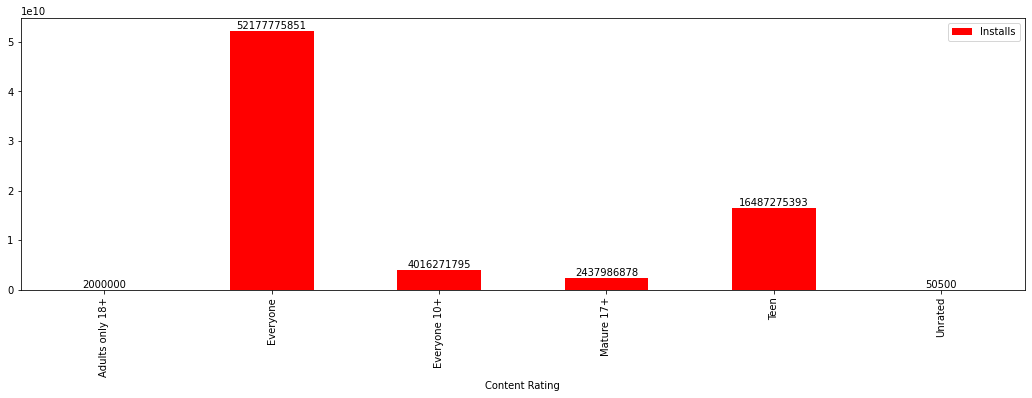

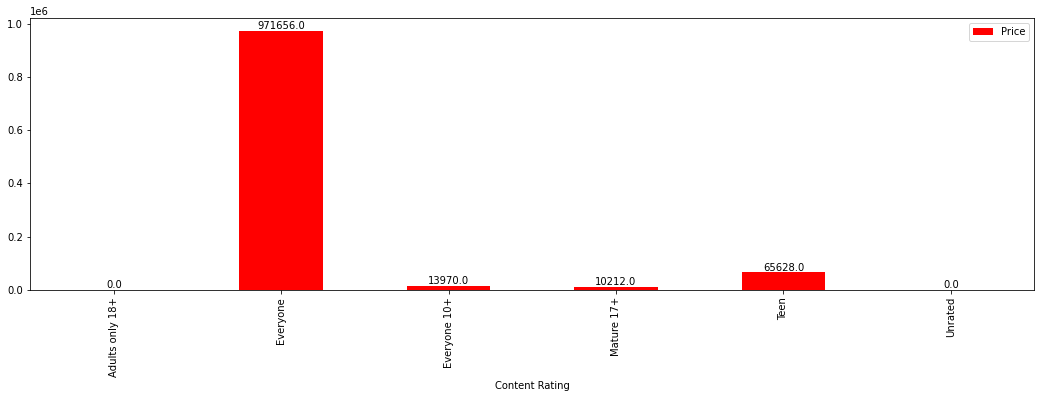

In [230]:
for i in content_rating_df.columns:
  if i!='Content Rating':
    content_rating_df.plot(x='Content Rating',y=i,kind='bar',color='r')
    for j in content_rating_df.index:
      plt.annotate(content_rating_df[i][j],xy=(j,content_rating_df[i][j]),ha='center',va='bottom')
    plt.show()

* Most of the users use the apps which are suitable for the content 'Everyone'


##5. Analyse for the best 'Genres' pe maximum installation


In [231]:
#groupby of Genres and Category with Installation mean
genres_df=df_PlayStore_copy.groupby(['Category','Genres'])['Installs'].mean()

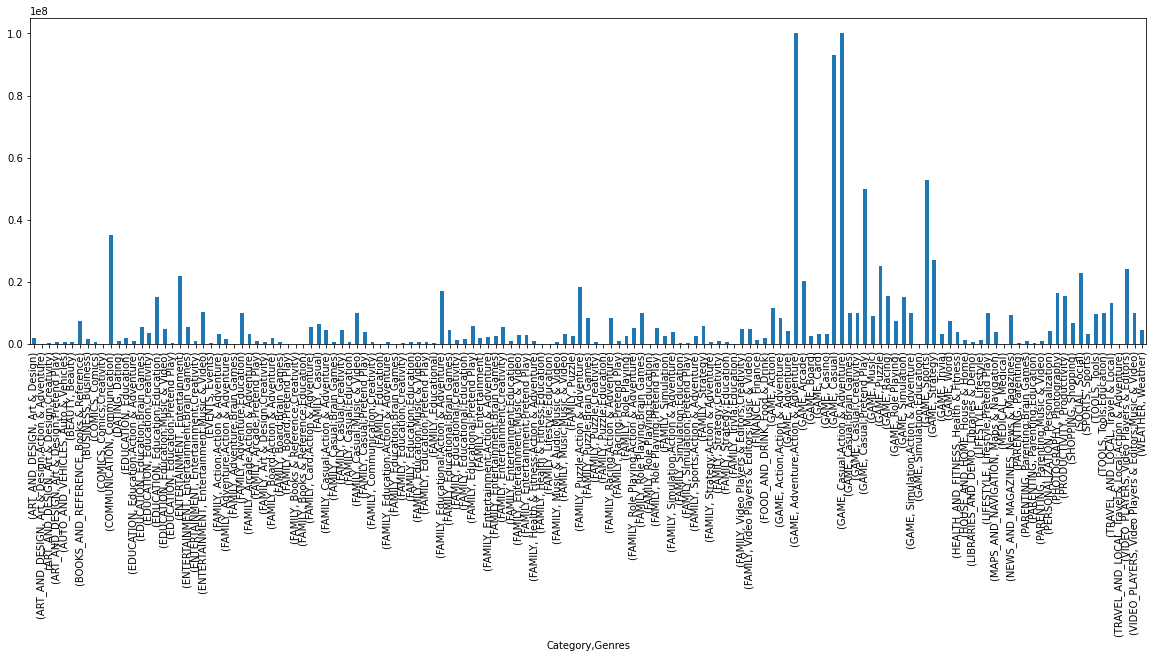

In [232]:
#Plot for Installs by Genres
genres_df.plot(x='Genres',y='Installs',kind='bar',figsize=(20,6))
plt.show()

* Two genres 'Adventure;Action & Adventure' and 'Casual; Action & Adventure' are the highest installed genres of 'GAME' Category


###>>From the above analysis of the playstore dataset we can see that 
* Best app of Free type belongs to GAME Category.
* Game is the best Category among all of the Categories and 'SUBWAY SURFERS' is the best gaming app in user's instance, because this app has highest number of installations and having rating of 4.5 .
* For paid version apps best app is 'Minecraft' app from FAMILY Category. 
* 'Adventure;Action & Adventure' and 'Casual; Action & Adventure' are the highest installed genres of 'GAME' Category.

#**About User's Review dataset**


In [233]:
df_UserReview_copy.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [234]:
df_UserReview_copy.shape

(64295, 5)

In [235]:
df_UserReview_copy.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [236]:
df_UserReview_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


###**Column Description**

App = Name of the app

Translated_Review = Reviews that users have given

Sentiment = sentiments of the reviews(i.e positive, negative or neutral feedback)

Sentiment_Polarity = Sentiment polarity is the state of having two opposite or contradictory tendencies, opinions, or aspects (orientation of the expressed sentiment(Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement))(Rating values)

Sentiment_Subjectivity = Subjective sentence expresses some personal feelings, views, or beliefs.A subjective sentence may not express any sentiment(Lies between [0,1])

##DATA CLEANING OF USER'S REVIEW DATASET

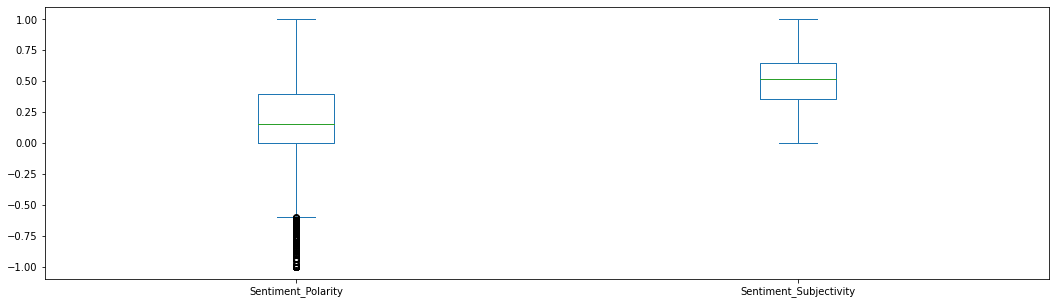

In [237]:
#Let's 1st check the data set if any of the values exceeds the maximum value of it's range for Sentiment_Polarity & Sentiment_Subjectivity column using box plot
df_UserReview_copy.plot(kind='box')

In [238]:
#Check the total number of null values
df_UserReview_copy.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

###For 'Translated_Review' column there are 26868 null vaues and all other columns except 'App' depends upon that column and we can't fill those null values of that column with other values, so let's drop those null values.

In [239]:
#Drop the null values
df_UserReview_copy.dropna(inplace=True)

In [240]:
#Check again if there is still any null value got skipped
df_UserReview_copy.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

###We can not delete  the duplicate values from this dataframe because more than one person can give same review(s) for a same app, as there is no rule of unique reviews for each user.


##So our Data cleaning for user's review dataset is done.

#**DATA ANALYSIS**

###Check which sentiment has given more in the User's Review Dataset.

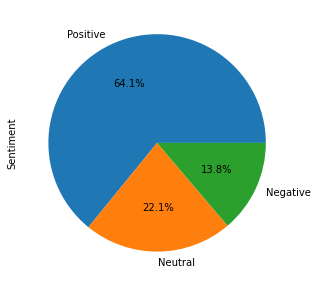

In [241]:
#Let's draw a pie plot for unique values of 'Sentiment' to check their percentage
df_UserReview_copy['Sentiment'].value_counts().plot(kind='pie',labels=df_UserReview_copy['Sentiment'].unique(),autopct='%.1f%%')

* From the pie chart we can see that in the playstore application out of all the reviews, there are more number of Positive reviews (64% reviews are positive), 22% are Neutral reviews, and almost 14% reviews are Negative reviews .

##**Let's merge the playstore and user review data set to get more details**

In [242]:
#Merging the two dataframe using inner join
merged_df1 = pd.merge(df_PlayStore_copy, df_UserReview_copy, how='inner',left_on='App',right_on='App') 

In [243]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 35928
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35929 non-null  object 
 1   Category                35929 non-null  object 
 2   Rating                  35929 non-null  float64
 3   Reviews                 35929 non-null  int64  
 4   Size                    35929 non-null  float64
 5   Installs                35929 non-null  int64  
 6   Type                    35929 non-null  object 
 7   Price                   35929 non-null  float64
 8   Content Rating          35929 non-null  object 
 9   Genres                  35929 non-null  object 
 10  Last Updated            35929 non-null  object 
 11  Current Ver             35929 non-null  object 
 12  Android Ver             35929 non-null  object 
 13  Translated_Review       35929 non-null  object 
 14  Sentiment               35929 non-null

###From the info of merged_df1 we got to know that there is no null value exists, so we can do our further analysis.

In [244]:
merged_df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [245]:
merged_df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

##6. Let's check, out of all the installed apps which sentiment is the highest.

In [246]:
#Sentiment wise number of installs of app
merged_df1.groupby(['Sentiment'])['Installs'].mean()

Sentiment
Negative    5.970095e+07
Neutral     2.910159e+07
Positive    4.133855e+07
Name: Installs, dtype: float64

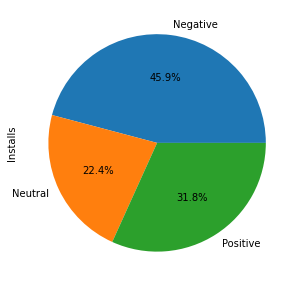

In [247]:
merged_df1.groupby(['Sentiment'])['Installs'].mean().plot(kind='pie',autopct='%.1f%%')

* Among all the apps that are Installed,on an average Negative reviews(about 46% of installed apps) are more.
* 32% of installed apps have Positive reviews and 22% have Neutrals.

###Number of Sentiments got by the apps per Category


In [248]:
#Categorical sentiment
categorical_sentiment=merged_df1.groupby(['Category'])['Sentiment'].value_counts().sort_values(ascending=False)#.plot(kind='bar')
categorical_sentiment

Category            Sentiment
GAME                Positive     3936
                    Negative     2408
HEALTH_AND_FITNESS  Positive     1754
FAMILY              Positive     1249
DATING              Positive     1068
                                 ... 
AUTO_AND_VEHICLES   Negative       17
EVENTS              Neutral        17
                    Negative       16
COMICS              Neutral         5
                    Negative        1
Name: Sentiment, Length: 99, dtype: int64

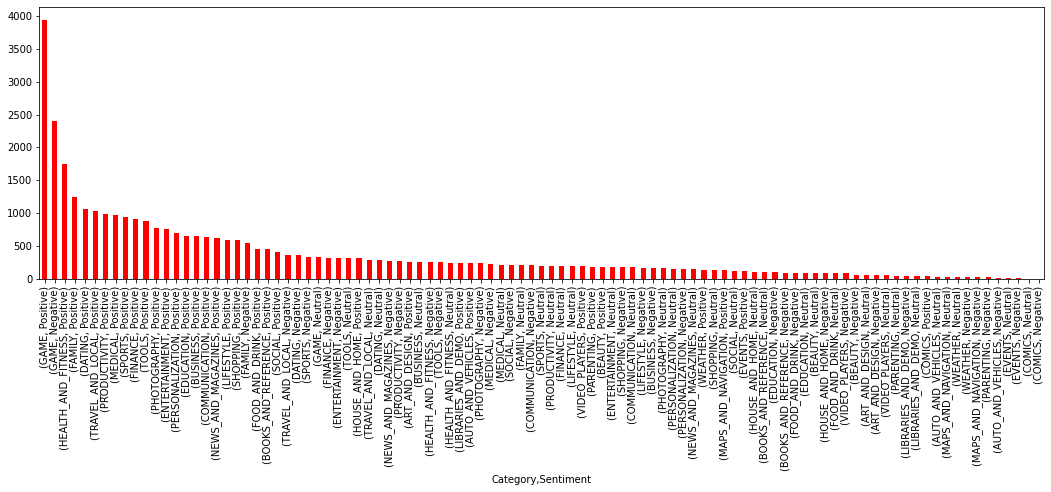

In [249]:
categorical_sentiment.plot(kind='bar',color='r')

* In playstore application Positive Sentiment is more for each apps.
* GAME category apps have more reviews having more number of Positive Sentiments.
* COMICS category apps have less reviews.

### Find out Which Sentiment is maximum for which App


In [250]:
merged_df1.groupby(['Category','App'])['Sentiment'].value_counts().sort_values(ascending=False)

Category            App                                        Sentiment
GAME                Helix Jump                                 Positive     209
EDUCATION           Duolingo: Learn Languages Free             Positive     200
HEALTH_AND_FITNESS  Calorie Counter - Macros                   Positive     174
                    Calorie Counter - MyFitnessPal             Positive     169
GAME                Bowmasters                                 Positive     169
                                                                           ... 
EDUCATION           Canvas Student                             Neutral        1
TOOLS               Flashlight HD LED                          Negative       1
FINANCE             Current debit card and app made for teens  Negative       1
EDUCATION           Canvas Student                             Negative       1
NEWS_AND_MAGAZINES  CBS News                                   Neutral        1
Name: Sentiment, Length: 2240, dtype: int64

In [251]:
from scipy.stats import mode
merged_df1.groupby(['Sentiment'])['App'].agg(pd.Series.mode)

Sentiment
Negative                                  Angry Birds Classic
Neutral     [BET NOW - Watch Shows, BestCam Selfie-selfie,...
Positive                                           Helix Jump
Name: App, dtype: object

* 'Helix Jump' App of GAME Category has more number of Positive reviews and 'Angry Birds Classis' App has got highest Negative Reviews in PlayStore.

##7. Categorical Sentiment_Polarity and Sentiement_Subjectivity


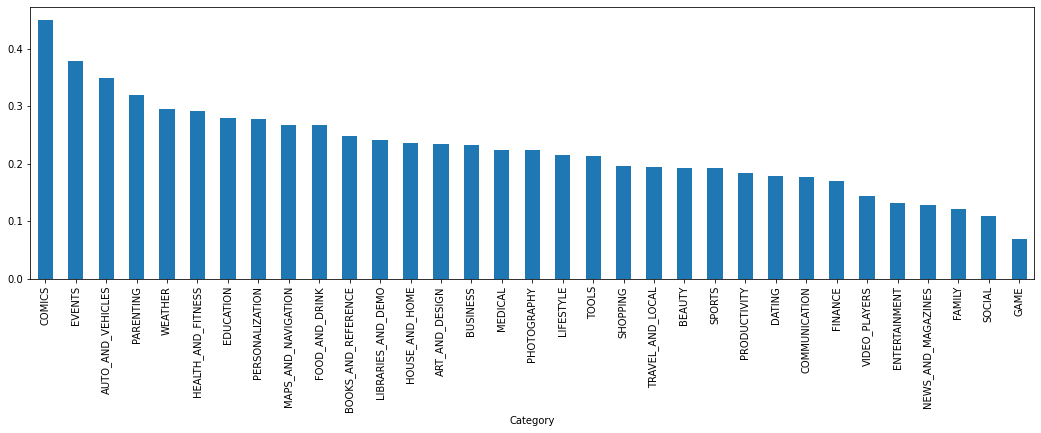

In [252]:
#categorical sentiment_polarity
merged_df1.groupby(['Category'])['Sentiment_Polarity'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(18,5))


* In the above graphs we can clearly see that, on average COMICS category has maximum Sentiment_Polarity as compared to others.

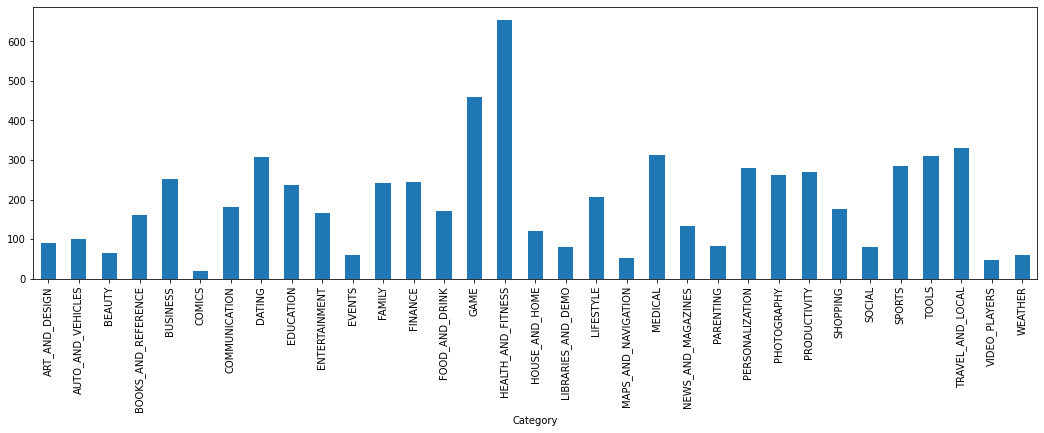

In [253]:
merged_df1.groupby(['Category'])['Sentiment_Polarity'].sum().plot(kind='bar')

* HEALTH_AND_FITNESS Category has the highest Sentiment Polarity, and GAME Category has the 2nd highest Polarity in total.

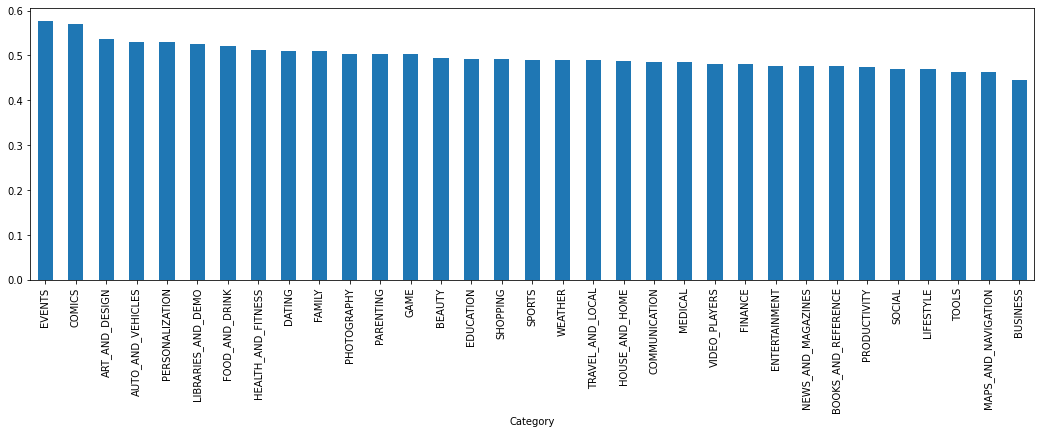

In [254]:
#Categorical sentiment_subjectivity 
merged_df1.groupby(['Category'])['Sentiment_Subjectivity'].mean().sort_values(ascending=False).plot(kind='bar')

* EVENTS Category has maximum Setiment_Subjectivity on average.


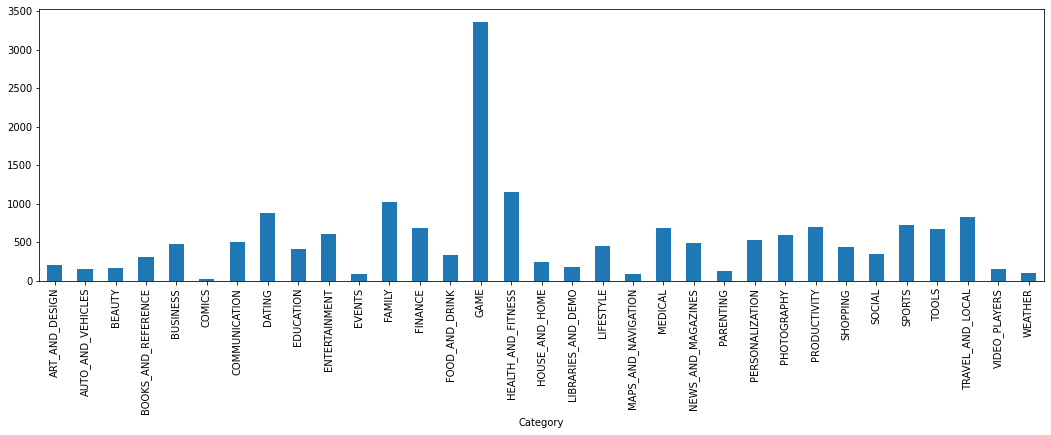

In [255]:
merged_df1.groupby(['Category'])['Sentiment_Subjectivity'].sum().plot(kind='bar')

* Unlike sentiment_polarity, sentiment_subjectivity has values in the range [0,1], so it has only positive values for all kind of sentiments and 0 for neutral sentiments.
* As Game category apps are installed more, it has more number of sentiments, so the sum total sentiment_Subjectivity of Game category apps have more than others.

##8. Which range of ratings have maximum number of apps


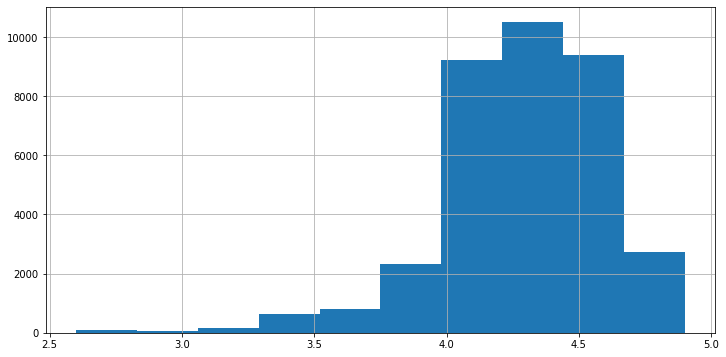

In [256]:
merged_df1['Rating'].hist(bins=10,figsize=(12,6))

* More than 10000 apps have got rating in between 4.2 to 4.5 of our DataSet.
* Almost 9000 of apps have got ratings between 4.0 to 4.6 .

##9. Let's see the correlations in the dataset


In [257]:
merged_corr= merged_df1.corr()
merged_corr

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.075736,0.056184,0.020145,-0.010055,0.092903,0.068758
Reviews,0.075736,1.000000,0.153914,0.564256,-0.020591,-0.080021,-0.009315
Size,0.056184,0.153914,1.000000,-0.002687,0.015257,-0.103308,0.016068
Installs,0.020145,0.564256,-0.002687,1.000000,-0.025213,-0.057842,-0.006307
Price,-0.010055,-0.020591,0.015257,-0.025213,1.000000,0.024148,0.003182
Sentiment_Polarity,0.092903,-0.080021,-0.103308,-0.057842,0.024148,1.000000,0.259668
Sentiment_Subjectivity,0.068758,-0.009315,0.016068,-0.006307,0.003182,0.259668,1.000000


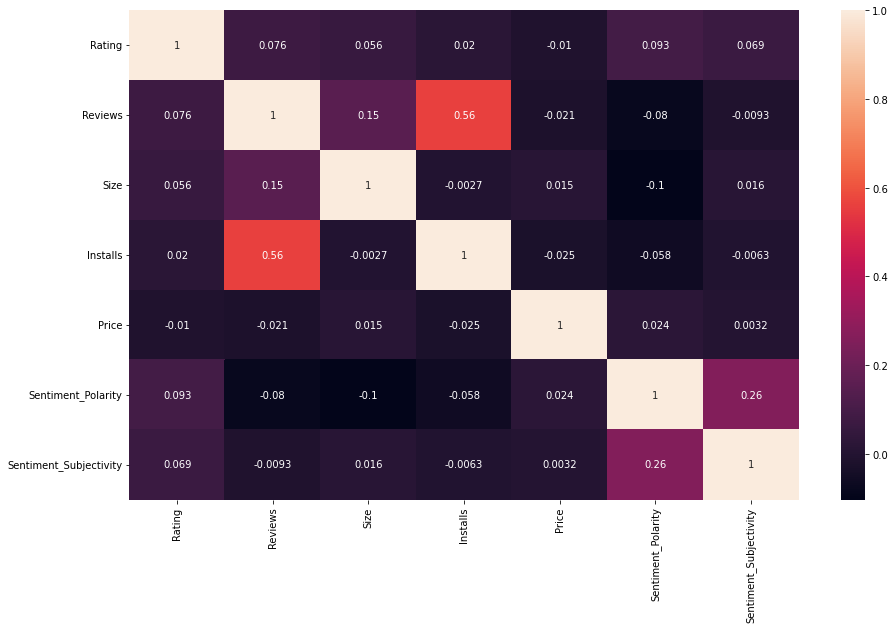

In [258]:
plt.rcParams['figure.figsize']=(15,9)
sns.heatmap(merged_corr,annot=True)

* 56% of installed apps have got reviews.
* **Sentiment Polarity** have positive correlation with **Sentiment Subjectivity**.That means if sentiment polarity has positive values, then sentiment subjectivity also has positive values and if polarity has negative values(decreases) then sentiment subjectivity also decreases towards 0.
* With increasing of **size** of apps, **Sentiment polarity** value is decreasing.

# **CONCLUSION**



1. Out of all the Category of PlayStore application **GAME** Category is most preferable Category for users.
2. **GAME, SOCIAL, and PHOTOGRAPHY**; these 3 categories are highet used Categories in public.
3. **'Subway surfers','Instagrams','Google Photos'**; are the best apps as per Installation and Rating in user's standpoint of 'GAME' , 'SOCIAL' , 'PHOTOGRAPHY' Categories respectively.
4. **'Minecraft'** App is the **highest profitable** app of **'Arcade;Action & Adventure'** Genres has got highest profit of **FAMILY** category, so this is the most profitable one for developers perspective.
5. Most of the **users (almost 92%) prefer Free apps** having a good rating.
6. **COMICS** Category has no positive reviews.
7. On average **COMICS** Category has the highest **Sentiment_Polarity** and **EVENTS** Category has the highest **Sentiment_Subjectivity**.
8. **56%** of apps that are installed have got reviews.